In [24]:
import numpy as np
import pymongo
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import mlflow
from mlflow.models import infer_signature

In [25]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

In [26]:
mlflow.start_run()

MlflowException: API request to http://127.0.0.1:8080/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=8080): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001CBE7F9BA50>: Failed to establish a new connection: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cible l’a expressément refusée'))

In [ ]:
client = pymongo.MongoClient('mongodb://localhost:27017/')

db = client['data_movies']

movies = db['movies']
users = db['users']

In [ ]:
distinct_genres = db.movies.aggregate([
    {
        "$project": {
            "genres": {"$split": ["$genres", "|"]}
        }
    },{
        "$unwind": "$genres"
    },
    {
        "$group": {
            "_id": "$genres",
            "count": {"$sum": 1}
        }
    },
    {
        "$sort": {
            "count": -1
        }
    }
])

[genre for genre in distinct_genres]

[{'_id': 'Drama', 'count': 1603},
 {'_id': 'Comedy', 'count': 1200},
 {'_id': 'Action', 'count': 503},
 {'_id': 'Thriller', 'count': 492},
 {'_id': 'Romance', 'count': 471},
 {'_id': 'Horror', 'count': 343},
 {'_id': 'Adventure', 'count': 283},
 {'_id': 'Sci-Fi', 'count': 276},
 {'_id': "Children's", 'count': 251},
 {'_id': 'Crime', 'count': 211},
 {'_id': 'War', 'count': 143},
 {'_id': 'Documentary', 'count': 127},
 {'_id': 'Musical', 'count': 114},
 {'_id': 'Mystery', 'count': 106},
 {'_id': 'Animation', 'count': 104},
 {'_id': 'Fantasy', 'count': 68},
 {'_id': 'Western', 'count': 68},
 {'_id': 'Film-Noir', 'count': 44}]

In [ ]:
desired_genres = ['Children', 'Horror']
filtered_movies = db.movies.find({"genres": {"$regex": f".*{'|'.join(desired_genres)}.*"}})

In [ ]:
list(filtered_movies)

[{'_id': 1,
  'title': 'Toy Story (1995)',
  'genres': "Animation|Children's|Comedy"},
 {'_id': 2,
  'title': 'Jumanji (1995)',
  'genres': "Adventure|Children's|Fantasy"},
 {'_id': 8, 'title': 'Tom and Huck (1995)', 'genres': "Adventure|Children's"},
 {'_id': 12,
  'title': 'Dracula: Dead and Loving It (1995)',
  'genres': 'Comedy|Horror'},
 {'_id': 13, 'title': 'Balto (1995)', 'genres': "Animation|Children's"},
 {'_id': 34, 'title': 'Babe (1995)', 'genres': "Children's|Comedy|Drama"},
 {'_id': 48,
  'title': 'Pocahontas (1995)',
  'genres': "Animation|Children's|Musical|Romance"},
 {'_id': 54, 'title': 'Big Green, The (1995)', 'genres': "Children's|Comedy"},
 {'_id': 56,
  'title': 'Kids of the Round Table (1995)',
  'genres': "Adventure|Children's|Fantasy"},
 {'_id': 60,
  'title': 'Indian in the Cupboard, The (1995)',
  'genres': "Adventure|Children's|Fantasy"},
 {'_id': 70,
  'title': 'From Dusk Till Dawn (1996)',
  'genres': 'Action|Comedy|Crime|Horror|Thriller'},
 {'_id': 87,
  

In [ ]:
list(filtered_movies)

[]

In [ ]:
list(filtered_movies)

[]

In [ ]:
movies_ids = movies.find({'genres': {'$regex': 'Children|Horror'}}).distinct('_id')
users_ids = users.distinct('_id')

In [ ]:
df = pd.DataFrame(0, index=users_ids, columns=movies_ids)
df

,1,2,8,12,13,34,48,54,56,60,...,3931,3932,3933,3935,3938,3939,3940,3941,3942,3945
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
films = ['film1', 'film2', 'film3']

In [ ]:
idx = 0
for f in films:
    print(idx, f)
    idx += 1

0 film1
1 film2
2 film3


In [ ]:
for idx, f in enumerate(films):
    print(idx, f)

0 film1
1 film2
2 film3


In [ ]:
for u_id in users_ids:
    user = users.find_one({'_id': u_id})

    for m in user['movies']:
        
        m_id = m['movieid']
        rating = m['rating']

        if m_id in movies_ids:
            df.loc[u_id, m_id] = rating

In [ ]:
df

,1,2,8,12,13,34,48,54,56,60,...,3931,3932,3933,3935,3938,3939,3940,3941,3942,3945
1,5,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0,0,0,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6037,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6039,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df[df.sum(axis=1) > 0]
df

,1,2,8,12,13,34,48,54,56,60,...,3931,3932,3933,3935,3938,3939,3940,3941,3942,3945
1,5,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0,0,0,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6037,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6039,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_sparse = df.astype(pd.SparseDtype("float", 0))

In [ ]:

mlflow.autolog()
nmf = NMF(n_components=2)

# Fit the model to the user-item matrix
nmf.fit(df_sparse)

U = nmf.transform(df_sparse)  # User matrix
M = nmf.components_  # Item matrix

pred_matrix = np.dot(U, M)

print(mean_squared_error(df_sparse.values, pred_matrix))



2024/02/13 11:40:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/02/13 11:40:20 WARNING mlflow.data.pandas_dataset: Failed to infer schema for Pandas dataset. Exception: 'SparseDtype' object has no attribute 'itemsize'
2024/02/13 11:40:20 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/02/13 11:40:20 WARNING mlflow.sklearn: Failed to infer model signature: 'SparseDtype' object has no attribute 'itemsize'
2024/02/13 11:40:20 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/02/13 11:40:25 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\ProgramData\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils."
2024/02/13 11:40:26 WARNING mlflow.data.pa

0.35627635108319794


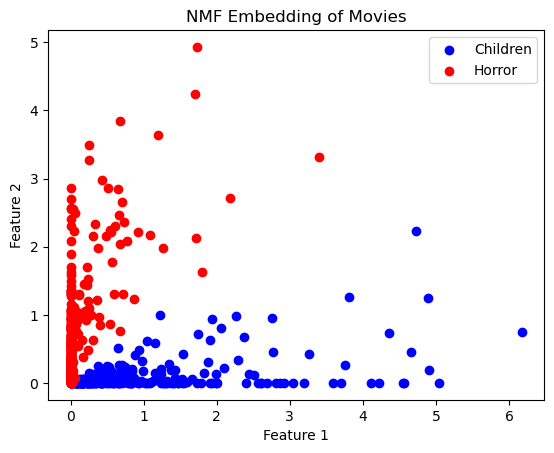

In [ ]:

children_indices = [idx for idx, movie_id in enumerate(movies_ids) if movies.find_one({'_id': movie_id})['genres'].find('Children') != -1]
horror_indices = [idx for idx, movie_id in enumerate(movies_ids) if movies.find_one({'_id': movie_id})['genres'].find('Horror') != -1]

M_children = M[:, children_indices]
M_horror = M[:, horror_indices]

plt.scatter(M_children[0, :], M_children[1, :], color='blue', label='Children')
plt.scatter(M_horror[0, :], M_horror[1, :], color='red', label='Horror')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('NMF Embedding of Movies')
plt.show()

In [ ]:
mlflow.end_run()